Dalam bagian ini akan dipelajari metode untuk mendeteksi keberadaan outlier di dalam data yang kita miliki.
Outlier kemudian dikeluarkan dari data untuk mendapatkan performa model yang lebih baik

1. Metode Isolation Forest

- Menggunakan data synthetic

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [4]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

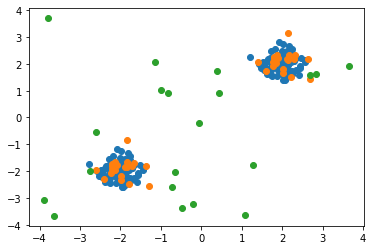

In [31]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(X_test[:,0], X_test[:,1])
plt.scatter(X_outliers[:,0], X_outliers[:,1])

In [62]:
clf = IsolationForest(contamination=0.1, max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [63]:
# select all rows that are not outliers
mask = y_pred_train != -1
train_not_otl = X_train[mask,:]
# select all rows that are not outliers
mask = y_pred_train == -1
train_otl = X_train[mask,:]

In [64]:
# select all rows that are not outliers
mask = y_pred_test != -1
test_not_otl = X_test[mask,:]
# select all rows that are not outliers
mask = y_pred_test == -1
test_otl = X_test[mask,:]

In [65]:
# select all rows that are not outliers
mask = y_pred_outliers != -1
outl_not_otl = X_outliers[mask,:]
# select all rows that are not outliers
mask = y_pred_outliers == -1
outl_otl = X_outliers[mask,:]

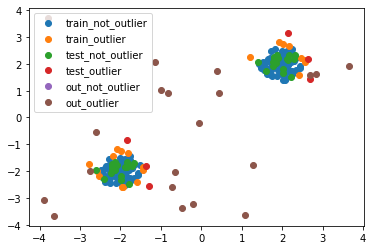

In [67]:
plt.scatter(train_not_otl[:,0], train_not_otl[:,1], label="train_not_outlier")
plt.scatter(train_otl[:,0], train_otl[:,1], label="train_outlier")

plt.scatter(test_not_otl[:,0], test_not_otl[:,1], label="test_not_outlier")
plt.scatter(test_otl[:,0], test_otl[:,1], label="test_outlier")

plt.scatter(outl_not_otl[:,0], outl_not_otl[:,1], label="out_not_outlier")
plt.scatter(outl_otl[:,0], outl_otl[:,1], label="out_outlier")

plt.legend()

Untuk metode deteksi outlier lainnya dapat dilihat dalam website berikut :
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

- Menggunakan data real world

In [74]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [71]:
data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
median = data["total_bedrooms"].median()
data["total_bedrooms"].fillna(median, inplace=True)
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/data["households"]

In [75]:
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

X_num = X.select_dtypes(exclude=["object"])
X_cat = X.select_dtypes(include=["object"])

onehot = OneHotEncoder()
X_cat_trans = onehot.fit_transform(X_cat)
X_cat_trans = X_cat_trans.toarray()
X_cat = pd.DataFrame(X_cat_trans, columns=onehot.categories_[0])

scaler = StandardScaler()
X_num_trans = scaler.fit_transform(X_num)
X_num = pd.DataFrame(X_num_trans, columns=X_num.columns)

X = pd.concat([X_num, X_cat], axis=1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [77]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 49604.501


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

iso = IsolationForest(contamination=0.02, random_state=1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train.values[mask, :], y_train.values[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(13551, 16) (13551,)
MAE: 49417.025
